# Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import datetime

import plotly.express as px
import plotly.graph_objects as go
import statistics as stat

# from tensorflow.keras.layers import Input, Dense, LeakyReLU
# from tensorflow.keras.models import Model, Sequential
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.losses import MSE
# from tensorflow.keras import regularizers
# from tensorflow.keras.callbacks import EarlyStopping
# from tensorflow.keras.layers import Dropout

# from sklearn.model_selection import train_test_split
# from sklearn.metrics import mean_squared_error, classification_report
# from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,plot_confusion_matrix, average_precision_score
# from sklearn.metrics import confusion_matrix 
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RandomizedSearchCV

import collections
# from imblearn.over_sampling import SMOTE
# from sklearn.preprocessing import StandardScaler
from scipy.stats import rankdata

# from sklearn.metrics import roc_curve, auc
# from sklearn.metrics import roc_auc_score

from sklearn.decomposition import PCA


%matplotlib inline
sns.set_style('white')
%config InlineBackend.figure_format = 'retina'

# Import Data

In [71]:
df = pd.read_csv("suspicious_acc.csv")
df.head()

,Event Time,Event Type,Line of Business,Risk Rating,Policy Score,LexID Digital,Account Login,Account Number,Customer Event Type,Transaction Amount,LexID Digital Trust Score Rating,True IP,True IP Geo,Input IP,Input IP Country,Smart ID,Exact ID,Session ID,Custom Attribute 9
0,2022-02-27 06:12:42,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,very_high,49.230.70.33,TH,49.230.70.33,thailand,b0c980225c624b638639683627a8f1f9,b0c980225c624b638639683627a8f1f9,d64676ae-7c09-430e-b657-77689bf1f4f3,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...
1,2022-02-27 06:12:25,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,very_high,49.230.70.33,TH,49.230.70.33,thailand,b0c980225c624b638639683627a8f1f9,b0c980225c624b638639683627a8f1f9,29e0fa65-2609-45eb-83b6-82567b06f685,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...
2,2022-02-27 06:12:07,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,very_high,49.230.70.33,TH,49.230.70.33,thailand,b0c980225c624b638639683627a8f1f9,b0c980225c624b638639683627a8f1f9,2737d42a-1895-4850-832f-da351af79b54,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...
3,2022-02-27 06:11:52,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,very_high,49.230.70.33,TH,49.230.70.33,thailand,b0c980225c624b638639683627a8f1f9,b0c980225c624b638639683627a8f1f9,c9ac6942-9049-4227-bee9-4de4996fe618,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...
4,2022-02-27 06:11:34,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,very_high,49.230.70.33,TH,49.230.70.33,thailand,b0c980225c624b638639683627a8f1f9,b0c980225c624b638639683627a8f1f9,63fd7f48-e292-4a15-91ef-1cfcd0ddd3e2,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...


In [104]:
### Information and data type of each features

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Event Time                        265 non-null    object        
 1   Event Type                        265 non-null    object        
 2   Line of Business                  265 non-null    object        
 3   Risk Rating                       265 non-null    object        
 4   Policy Score                      265 non-null    int64         
 5   LexID Digital                     265 non-null    object        
 6   Account Login                     265 non-null    object        
 7   Account Number                    265 non-null    object        
 8   Customer Event Type               265 non-null    object        
 9   Transaction Amount                265 non-null    int64         
 10  LexID Digital Trust Score Rating  265 non-null    

In [91]:
### Create new features about date and time

df['Event Time_date'] = [i.split(" ")[0] for i in df['Event Time']]
df['Event Time_time'] = [i.split(" ")[1] for i in df['Event Time']]
df['Event Time_year'] = [int(i.split(" ")[0].split("-")[0]) for i in df['Event Time']]
df['Event Time_month'] = [int(i.split(" ")[0].split("-")[1]) for i in df['Event Time']]
df['Event Time_day'] = [int(i.split(" ")[0].split("-")[2]) for i in df['Event Time']]

df['Event Time_hour'] = [int(i.split(" ")[1].split(":")[0]) for i in df['Event Time']]
df['Event Time_min'] = [int(i.split(" ")[1].split(":")[1]) for i in df['Event Time']]
df['Event Time_sec'] = [int(i.split(" ")[1].split(":")[2]) for i in df['Event Time']]

In [92]:
df.head()

,Event Time,Event Type,Line of Business,Risk Rating,Policy Score,LexID Digital,Account Login,Account Number,Customer Event Type,Transaction Amount,...,Custom Attribute 9,Event Time_new,Event Time_date,Event Time_time,Event Time_year,Event Time_month,Event Time_day,Event Time_hour,Event Time_min,Event Time_sec
0,2022-02-27 06:12:42,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:12:42,2022-02-27,06:12:42,2022,2,27,6,12,42
1,2022-02-27 06:12:25,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:12:25,2022-02-27,06:12:25,2022,2,27,6,12,25
2,2022-02-27 06:12:07,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:12:07,2022-02-27,06:12:07,2022,2,27,6,12,7
3,2022-02-27 06:11:52,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:11:52,2022-02-27,06:11:52,2022,2,27,6,11,52
4,2022-02-27 06:11:34,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:11:34,2022-02-27,06:11:34,2022,2,27,6,11,34


In [89]:
### Changing format from text to date

from datetime import datetime
date = []
for i in list(df['Event Time']):
    date.append(datetime.strptime(i, "%Y-%m-%d %H:%M:%S"))
    
df['Event Time_new'] = date

time = []
for i in list(df['Event Time_time']):
    time.append(datetime.strptime(i, "%H:%M:%S"))
    
df['Event Time_time'] = time

In [90]:
df.head()

,Event Time,Event Type,Line of Business,Risk Rating,Policy Score,LexID Digital,Account Login,Account Number,Customer Event Type,Transaction Amount,...,Custom Attribute 9,Event Time_new,Event Time_date,Event Time_time,Event Time_year,Event Time_month,Event Time_day,Event Time_hour,Event Time_min,Event Time_sec
0,2022-02-27 06:12:42,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:12:42,2022-02-27,1900-01-01 06:12:42,2022,2,27,6,12,42.0
1,2022-02-27 06:12:25,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:12:25,2022-02-27,1900-01-01 06:12:25,2022,2,27,6,12,25.0
2,2022-02-27 06:12:07,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:12:07,2022-02-27,1900-01-01 06:12:07,2022,2,27,6,12,7.0
3,2022-02-27 06:11:52,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:11:52,2022-02-27,1900-01-01 06:11:52,2022,2,27,6,11,52.0
4,2022-02-27 06:11:34,payment,ibanking,trusted,35,04f8529a4f1d42998cf554c807838d9b,214084229b0eb73cf23c424330ebaf7eeb785d14676b2a...,f6410ce1f426f16508e129a23117cb8eedfb3e8d9c5960...,existing_payment,50000,...,6dd1059cde082c86b080d1d9b701d5ad40a6e4a2171d77...,2022-02-27 06:11:34,2022-02-27,1900-01-01 06:11:34,2022,2,27,6,11,34.0


In [29]:
df.columns

Index(['Event Time', 'Event Type', 'Line of Business', 'Risk Rating',
       'Policy Score', 'LexID Digital', 'Account Login', 'Account Number',
       'Customer Event Type', 'Transaction Amount',
       'LexID Digital Trust Score Rating', 'True IP', 'True IP Geo',
       'Input IP', 'Input IP Country', 'Smart ID', 'Exact ID', 'Session ID',
       'Custom Attribute 9', 'Event Time_date', 'Event Time_time',
       'Event Time_year', 'Event Time_month', 'Event Time_day',
       'Event Time_hour', 'Event Time_min', 'Event Time_sec'],
      dtype='object')

In [85]:
list_columns = ['Event Type', 'Line of Business', 'Risk Rating',
                'LexID Digital', 'Account Login', 
                'Account Number', 'Customer Event Type', 'Input IP Country',
                'Custom Attribute 9']

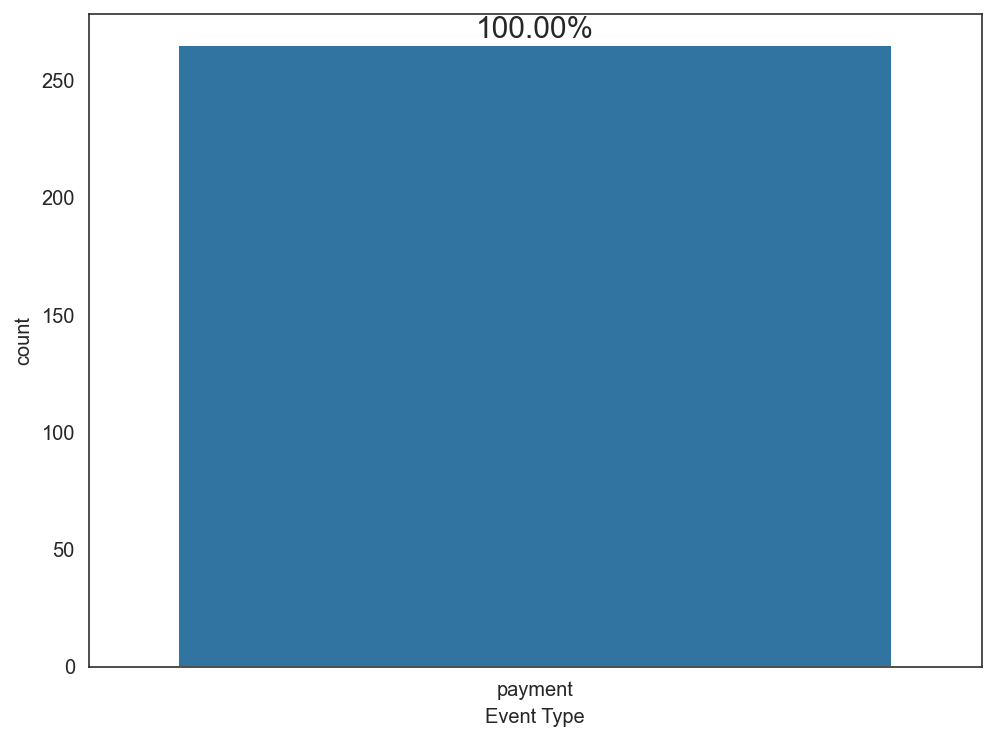

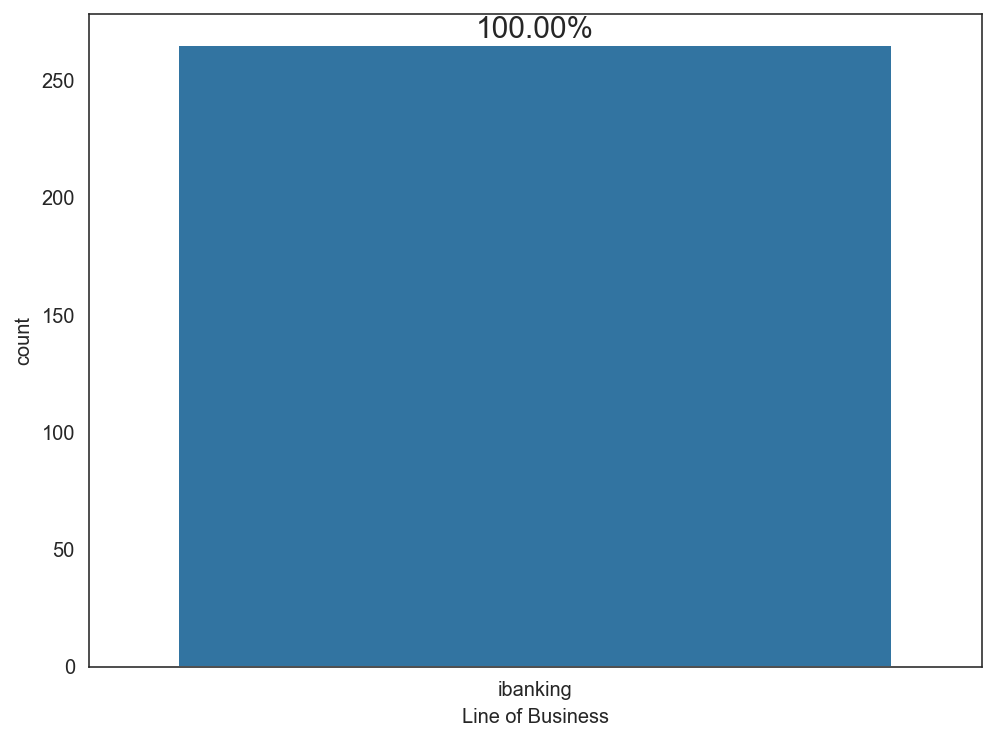

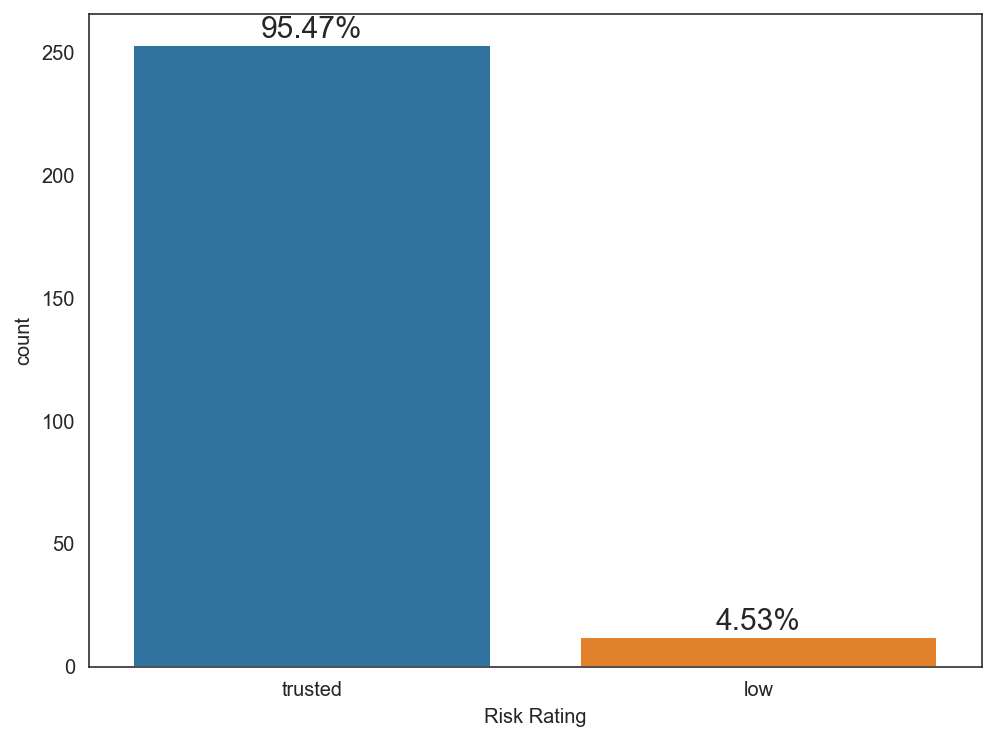

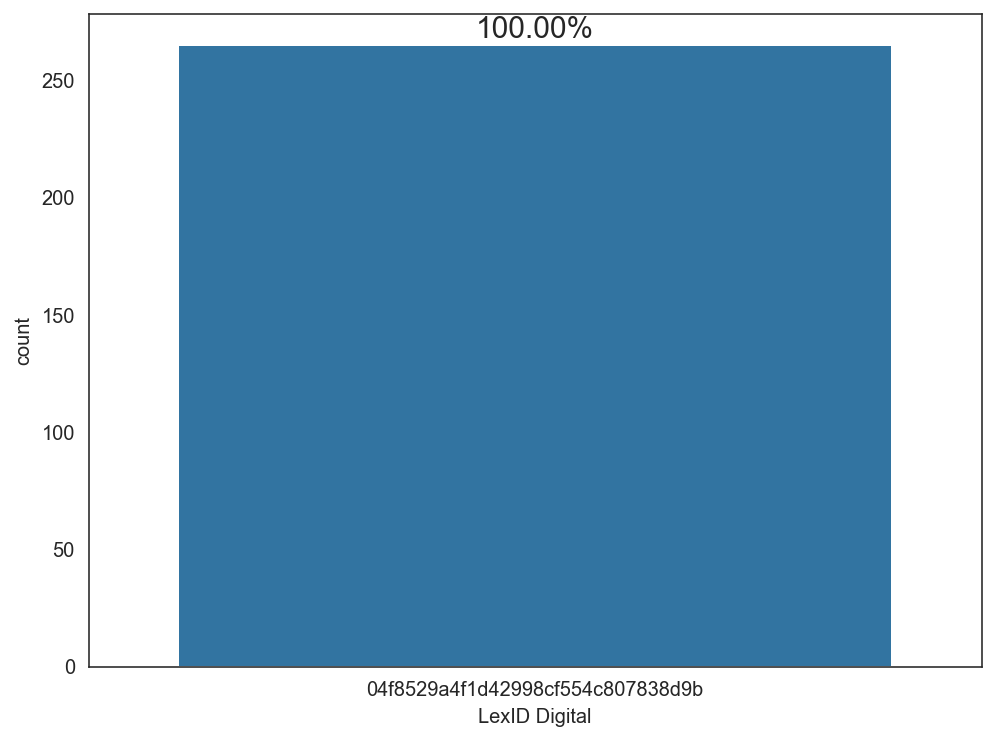

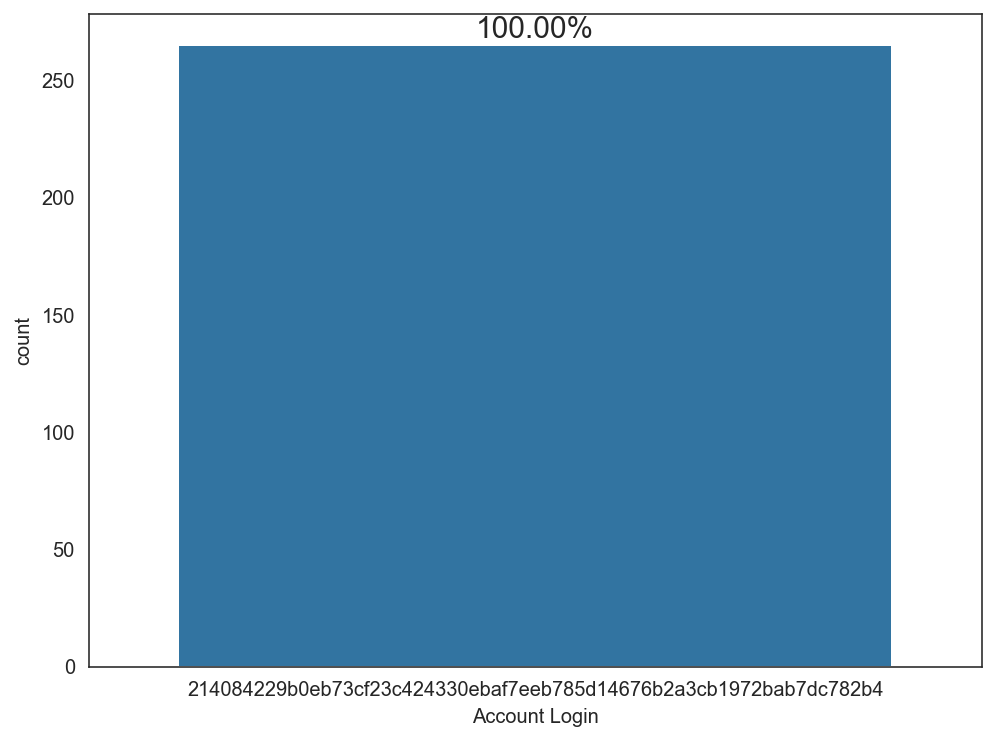

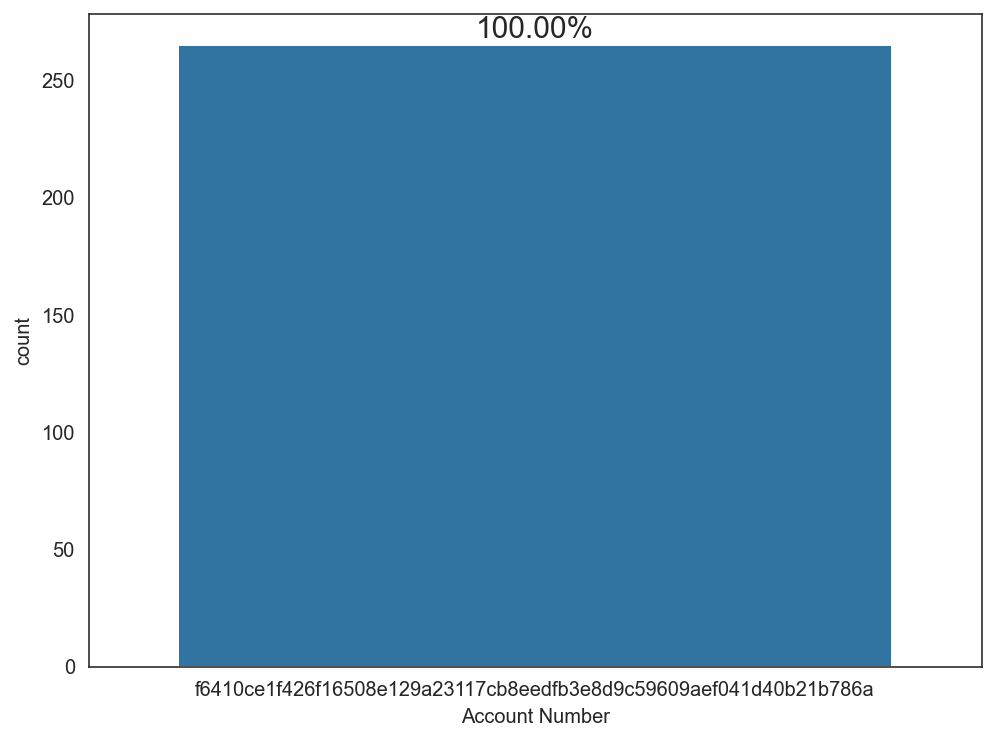

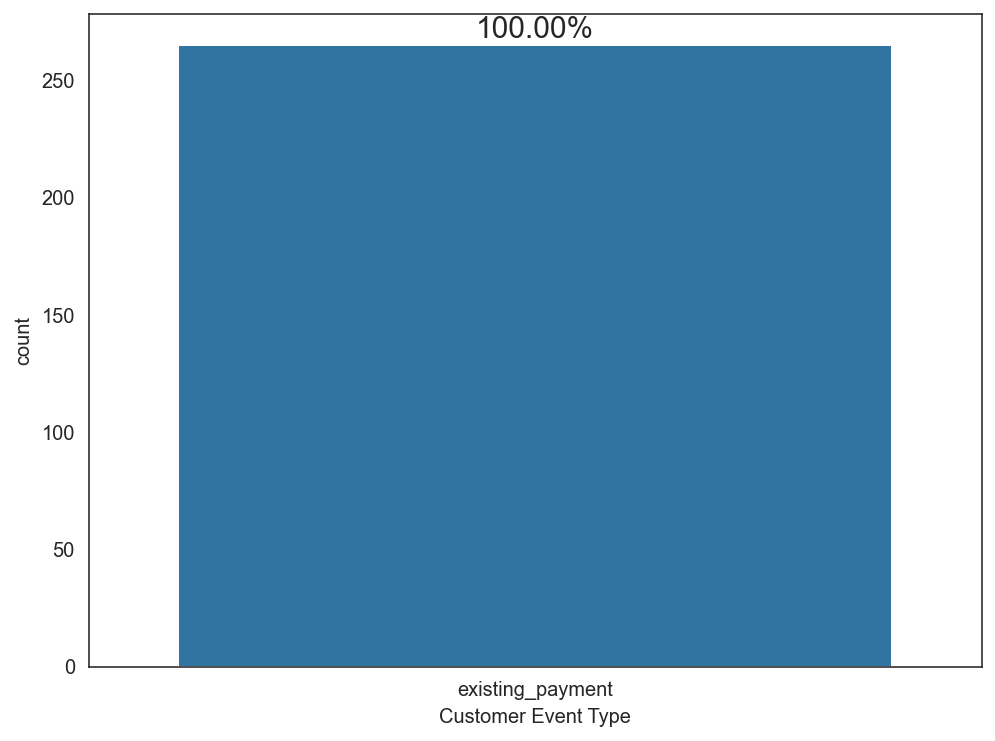

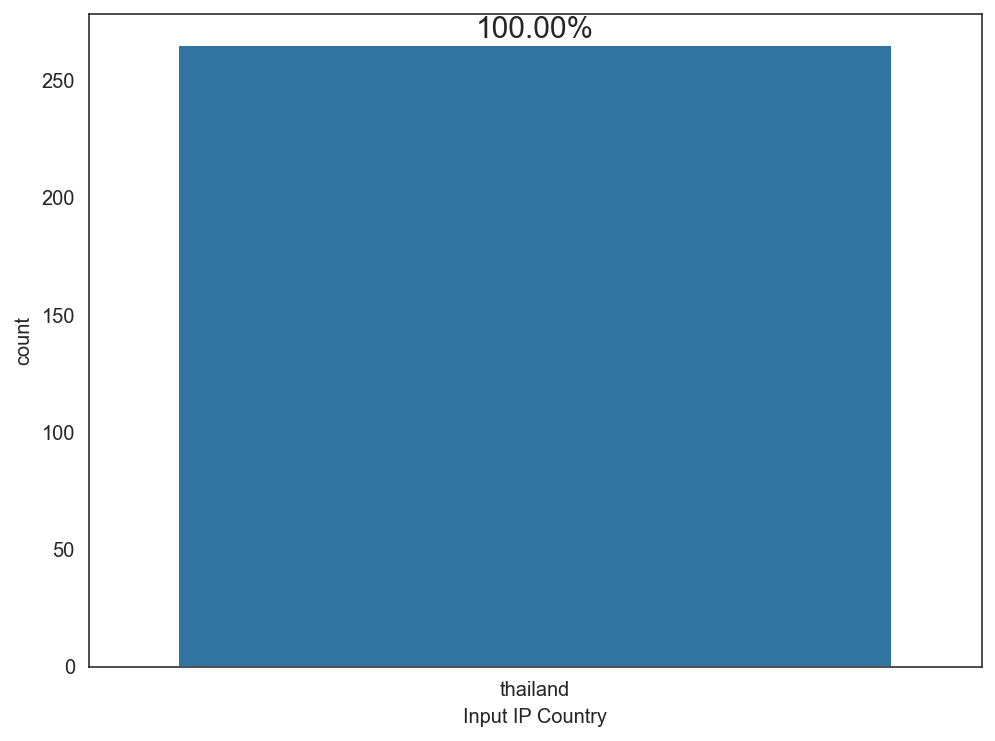

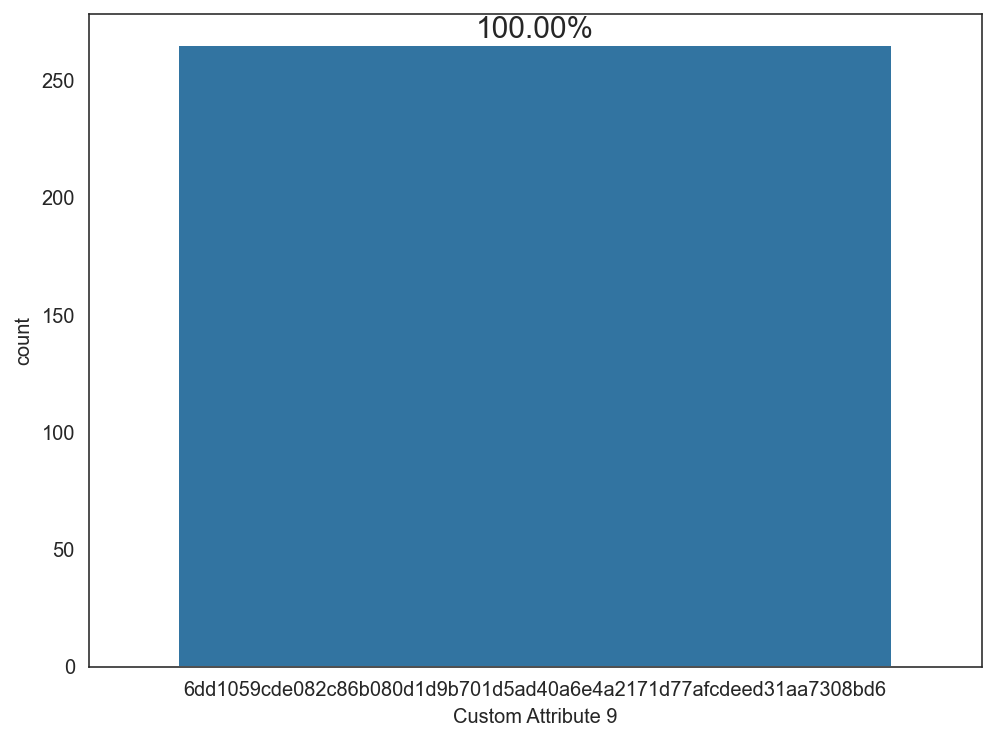

In [86]:
### Explore some feature to see the count of each categorical data

for i in list_columns:
    plt.figure(figsize=(8,6))
    total = len(df)
    total_amt = df.groupby([i])['Transaction Amount'].sum().sum()
    g = sns.countplot(x=i, data=df)
    for p in g.patches:
        height = p.get_height()
        g.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(height/total*100),
                ha="center", fontsize=15)

In [38]:
### Almost of all transaction amount = 50,000

df['Transaction Amount'].value_counts()

50000.0    261
22000.0      1
42000.0      1
34000.0      1
25000.0      1
Name: Transaction Amount, dtype: int64

In [121]:
### Plot graph to see more information about time and transaction amount

fig = px.scatter(data_frame = df,
                 x = 'Event Time_new', y = 'Transaction Amount',
                 template = 'plotly_white', width = 800, height = 500)
fig.update_layout(showlegend = True, uniformtext_minsize = 12, xaxis_tickangle = 0, xaxis_tickfont_size = 12)
fig.show()

In [122]:
### Plot graph to see more information about time (in hour) and transaction amount

fig = px.scatter(data_frame = df,
                 x = 'Event Time_hour', y = 'Transaction Amount', color = 'Policy Score',
                 template = 'plotly_white', width = 800, height = 500)
fig.update_layout(showlegend = True, uniformtext_minsize = 12, xaxis_tickangle = 0, xaxis_tickfont_size = 12)
fig.show()

<AxesSubplot:xlabel='Event Time_hour', ylabel='count'>

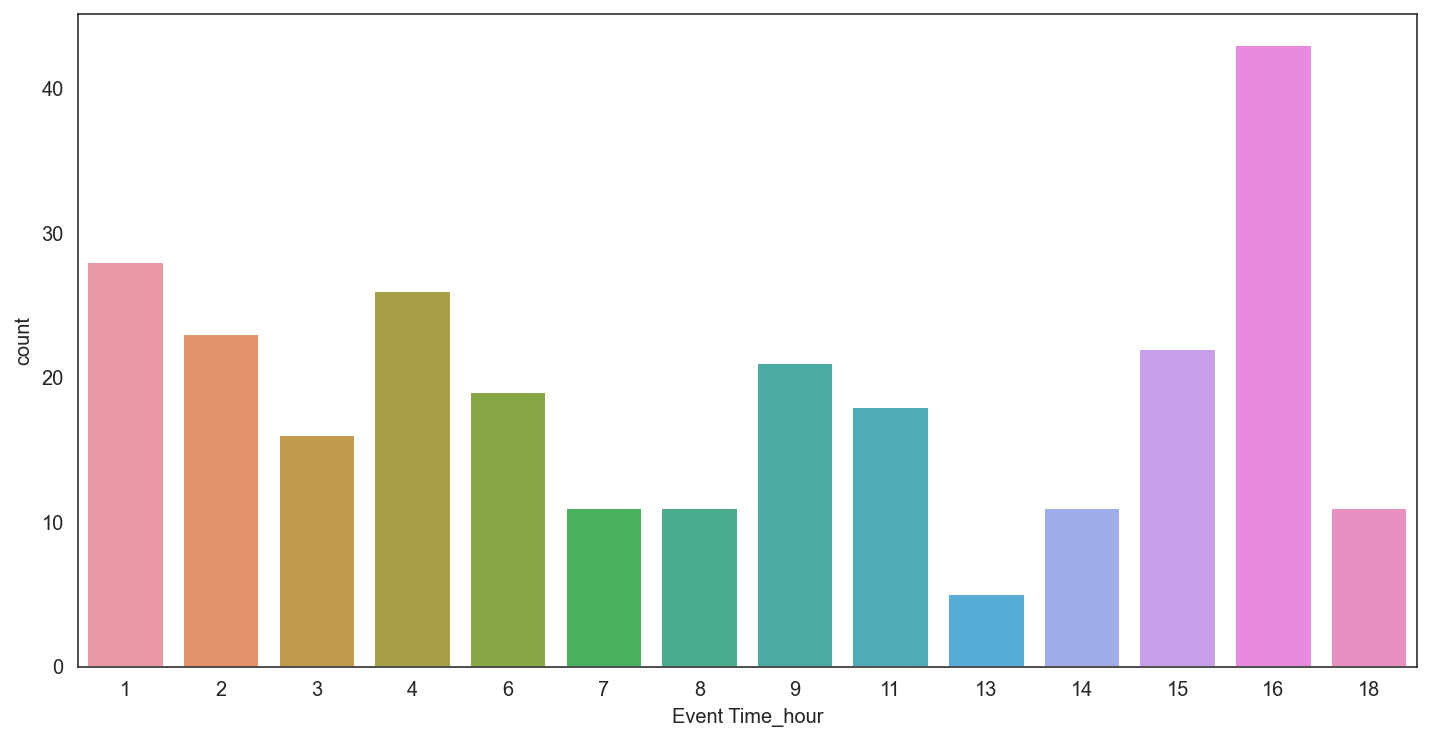

In [98]:
### Plot graph to see the concentration of transaction in each hour

plt.figure(figsize = (12,6))
sns.countplot(data = df, x = 'Event Time_hour')